1 Problem Statement
• To predict the temperature using Algerian forest fire dataset


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [77]:
url = "https://raw.githubusercontent.com/subhashdixit/Linear_Regression/main/Algerian_Forest_Dataset/Algerian_forest_fires_dataset.csv"
df=pd.read_csv(url,header=1 )

In [78]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


Data Checks and cleaning

Checking Null Values

In [79]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Dropping the row with null value

In [80]:
df.drop([122,123,167],axis=0, inplace=True)
df = df.reset_index()
df.head()


,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


Show all the columns

In [81]:
df.columns


Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

Checking Columns with Extra Spaces

In [82]:
[x for x in df.columns if ' ' in x]

[' RH', ' Ws', 'Rain ', 'Classes  ']

Remove extra space in column names


In [83]:
df.columns = df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [84]:
import re
def Remove_Extra_Space(x):
    return (re.sub(' +', ' ', x).strip())

Remove extra space in the data

In [85]:
df['Classes'] = df['Classes'].apply(Remove_Extra_Space)

Drop extra index column

In [86]:
df.drop(['index'],axis=1, inplace=True)

Create date feature with the help of day, month and year feature and convert to datetime

In [87]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

Drop day, month and year feature

In [88]:
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

Imputation of date based on temperature. Usually in summer temperature is more and in winter it is less. So, we have categorized it based on month

In [89]:
def date_imputation(x):
  if (x >= pd.to_datetime('2012-07-01')) and (x <= pd.to_datetime('2012-09-01')):
    return 1
  else:
    return 0
df['date'] = df['date'].apply(date_imputation)

In [90]:
df['date'].value_counts()

1    125
0    118
Name: date, dtype: int64

Sidi-Bel Abbes Region and Bejaia Region - are classified with 0 and 1

In [91]:
df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1

check null values in all the features

In [92]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

Mapping Classes as 1 & 0 for No fire, fire

In [93]:
df['Classes'] = df['Classes'].map({'not fire' : 0, 'fire': 1})

Check duplictes values in all the column

In [94]:
df.duplicated().sum()

0

Check data types of all the features

In [95]:
df.dtypes

Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes          int64
date             int64
Region         float64
dtype: object

Convert features to its logical datatypes

In [96]:
convert_data = {'Temperature' : 'float64', 'RH': 'float64', 'Ws': 'float64',
 'DMC' : 'float64', 'DC' : 'float64', 'ISI': 'float64', 'BUI': 'float64', 'FWI' : 'float64', 
 'Region' : 'object', 'Rain' : 'float64', 'FFMC' : 'float64' , 'Classes':'object','date':'object'}
df = df.astype(convert_data)

In [97]:
df.dtypes #converted

Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
date            object
Region          object
dtype: object

Unique values

In [98]:
df.nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          2
date             2
Region           2
dtype: int64

Statics of Data Set

In [99]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


Categorical features

In [100]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_feature

['Classes', 'date', 'Region']

In [101]:
for feature in categorical_feature:
 print(df.groupby(feature)[feature].value_counts())

Classes  Classes
0        0          106
1        1          137
Name: Classes, dtype: int64
date  date
0     0       118
1     1       125
Name: date, dtype: int64
Region  Region
0.0     0.0       122
1.0     1.0       121
Name: Region, dtype: int64


Numerical Features

In [102]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print(numerical_features)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


Discrete feature from Numerical Feature

In [103]:
#the assumption to consider a feature discrete is that it should have less than 35 unique values otherwise it will be 
# considered continuous feature
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<18]
discrete_features

[]

Continuous Features

In [104]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


# Graphical Analysis

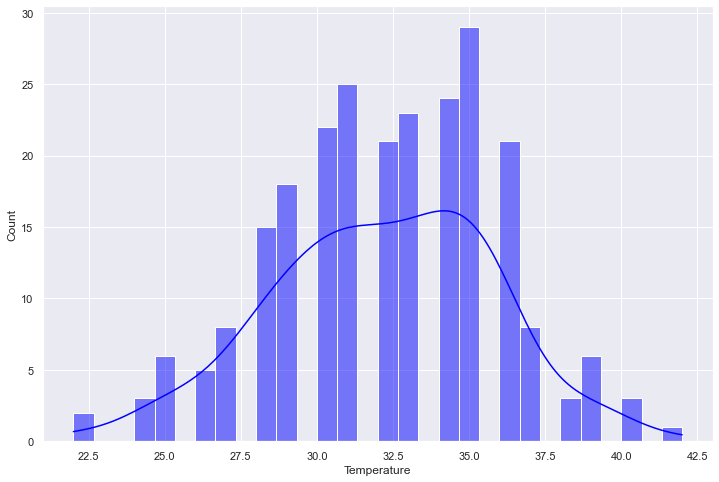

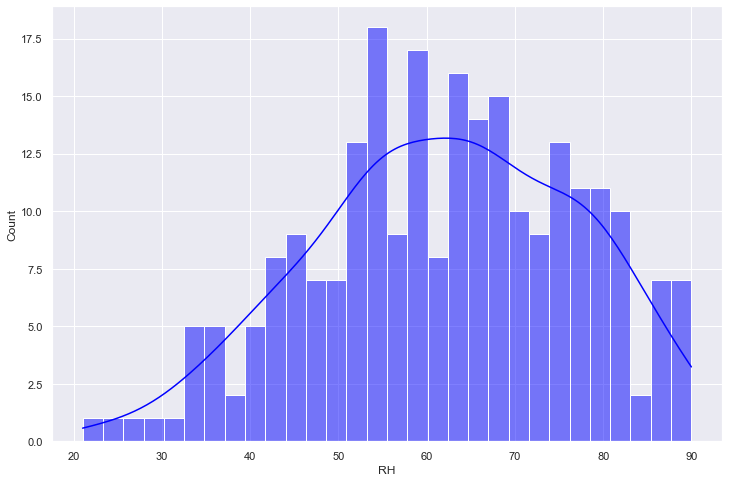

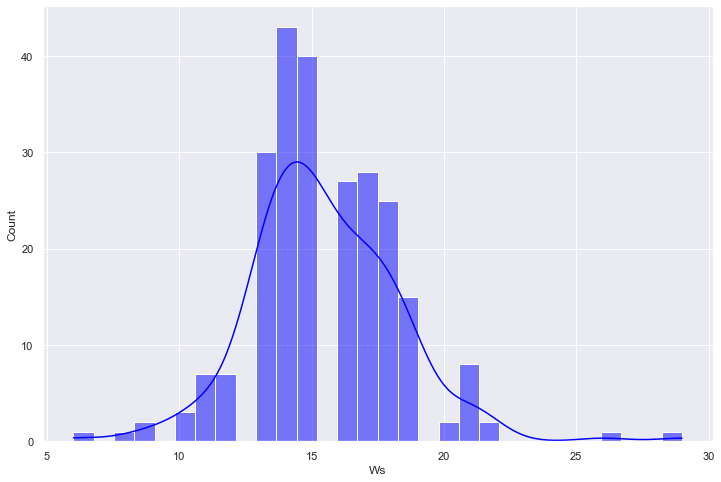

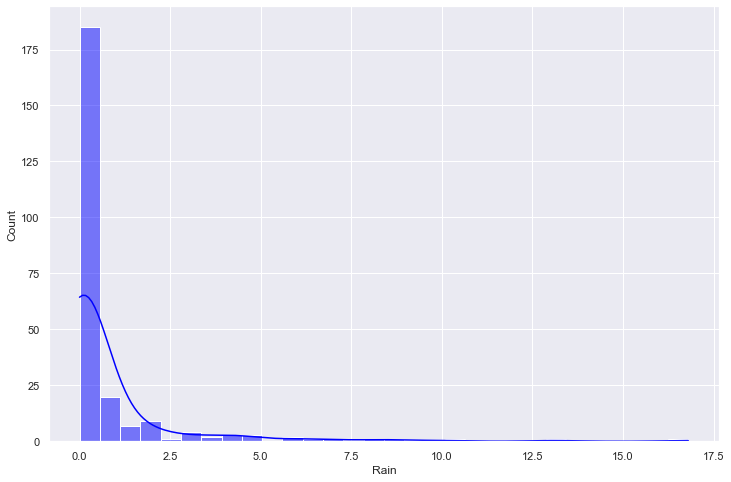

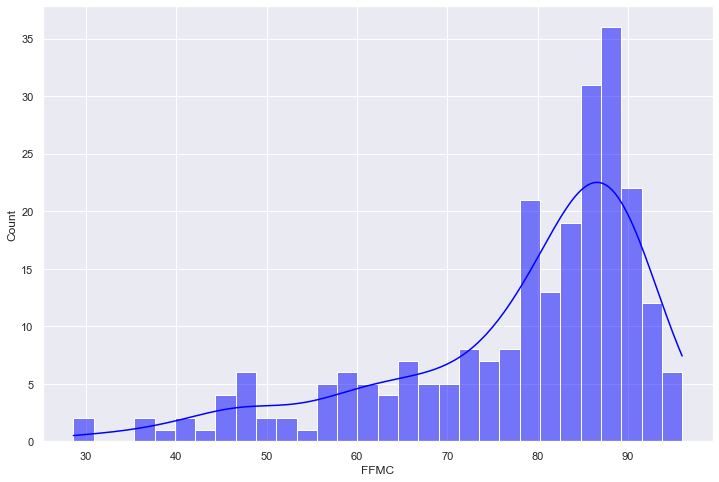

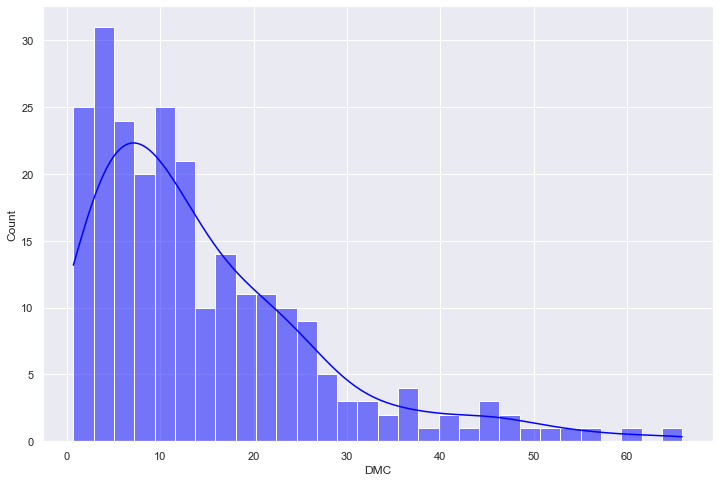

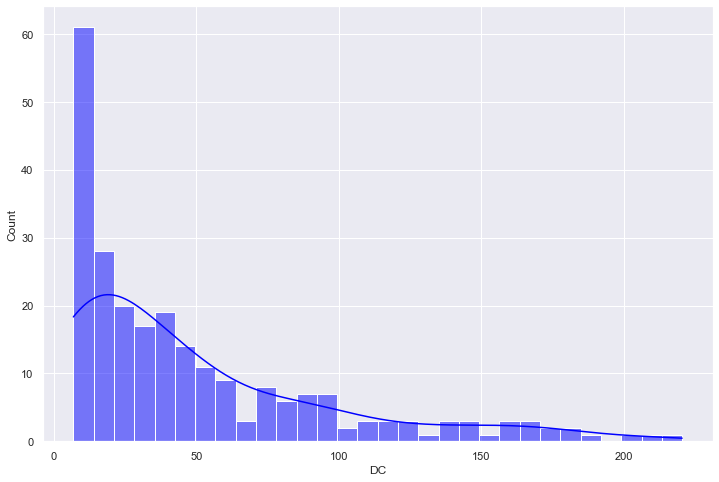

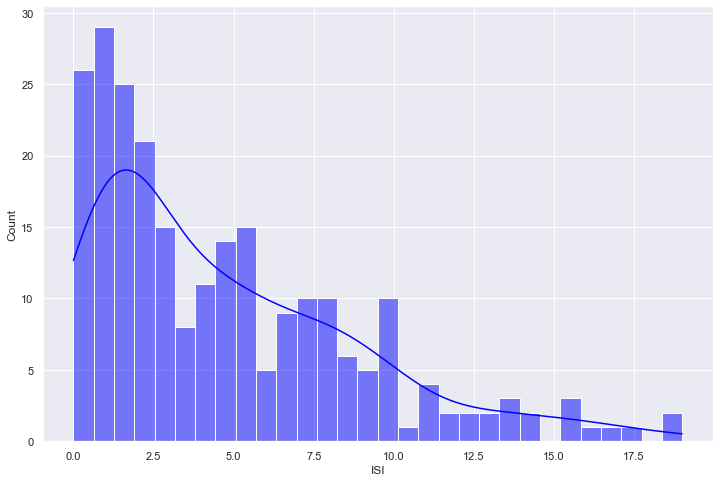

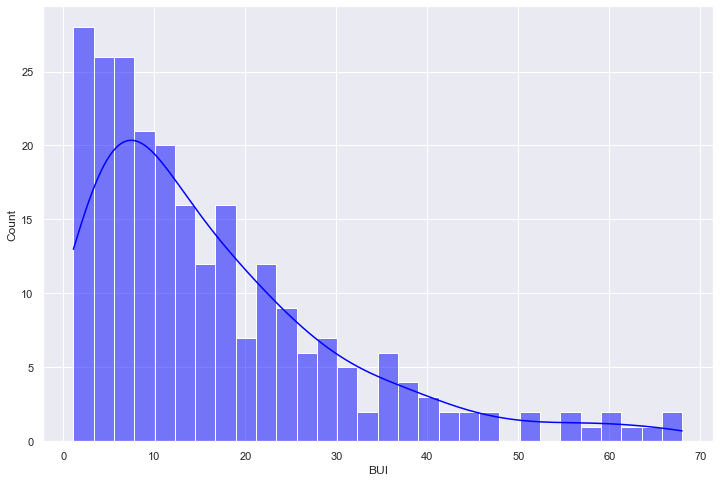

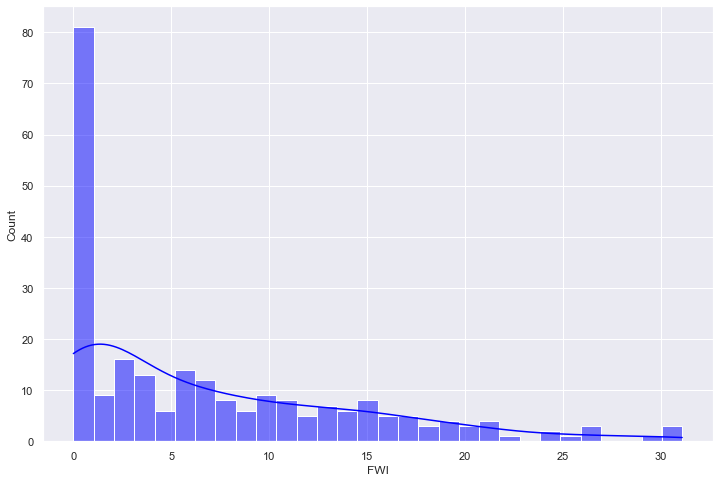

In [105]:
#observing distribution for continuous feature
for feature in continuous_features:
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=feature,kde=True, bins=30, color='blue')
    plt.show();

# Outliers Handling

Text(0.5, 1.0, 'Before Removing Outliers')

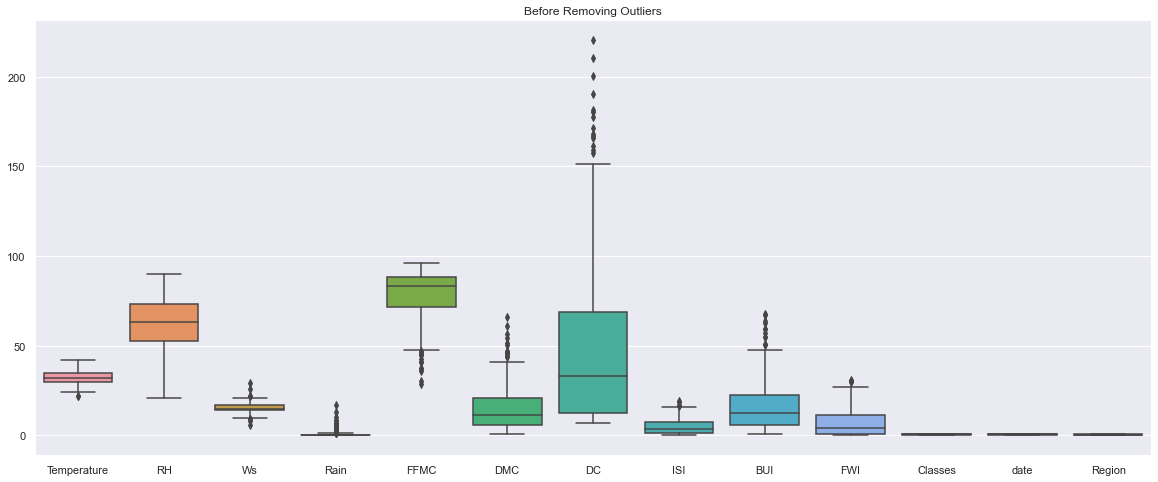

In [106]:
#Prior to removing outliers
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)
plt.title("Before Removing Outliers")

In [107]:
#Upper & Lower boundaries
def find_boundaries(df, variable, distance):
 IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
 lower_boundary = df[variable].quantile(0.25) - (IQR*distance)
 upper_boundary = df[variable].quantile(0.75) + (IQR*distance)
 return upper_boundary, lower_boundary

In [108]:
#outlier Deletion
outliers_columns = ['Temperature', 'Ws','Rain','FFMC','DMC','ISI','BUI', 'FWI']
for i in outliers_columns:
  upper_boundary, lower_boundary = find_boundaries(df,i, 1.5)
  outliers = np.where(df[i] > upper_boundary, True, np.where(df[i] < lower_boundary, True, False))
  outliers_df = df.loc[outliers, i]
  df_trimed= df.loc[~outliers, i]
  df[i] = df_trimed

Text(0.5, 1.0, 'After Removing Outliers')

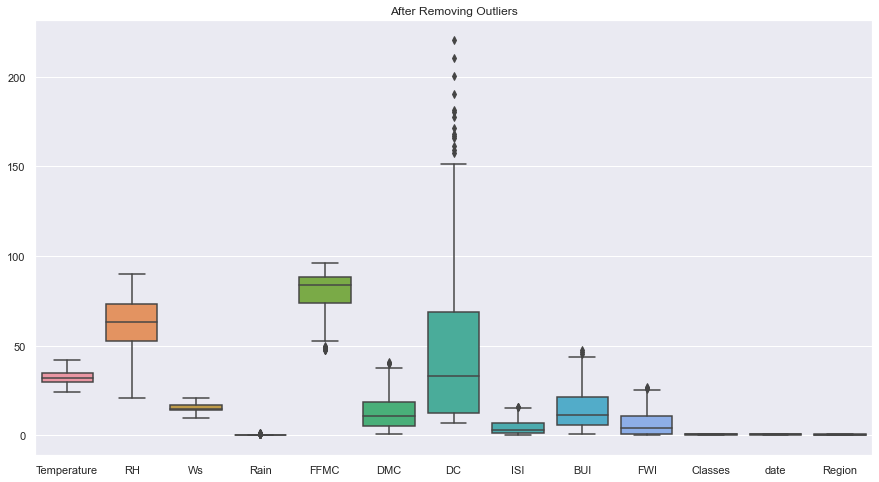

In [109]:
#After removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("After Removing Outliers")

In [110]:
df.isnull().sum() #null value check

Temperature     2
RH              0
Ws              8
Rain           35
FFMC           13
DMC            12
DC              0
ISI             4
BUI            11
FWI             4
Classes         0
date            0
Region          0
dtype: int64

In [113]:
df.fillna(df.median().round(1), inplace=True) #Imputation of null values from features


In [114]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

# Statistical Analysis

Correlation of numerical variable

In [115]:
data = round(df.corr(),2)

<AxesSubplot:>

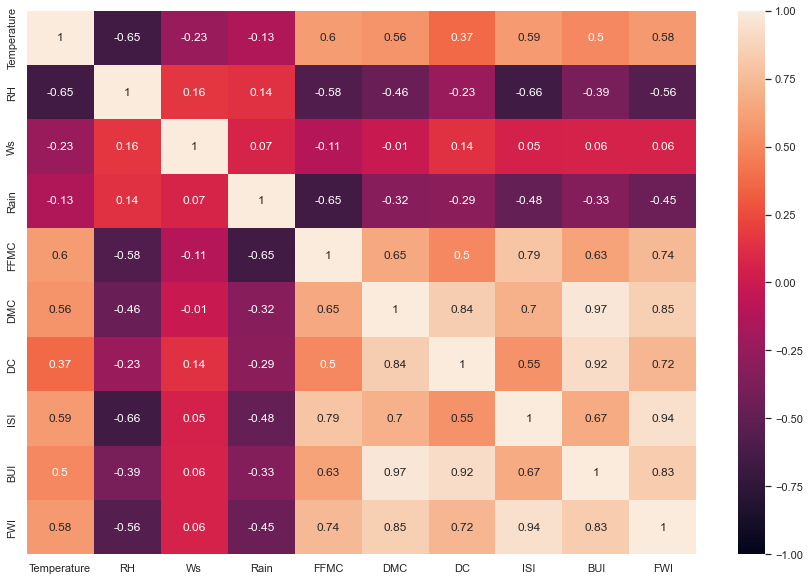

In [112]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data, annot=True,  vmin=-1, vmax=1)

DMC and BUI are highly correlated 0.97, will drop BUI

In [116]:
df.drop('BUI', axis=1, inplace=True)

# Model Building

Independent features vs target features distribution

<AxesSubplot:xlabel='date', ylabel='Temperature'>

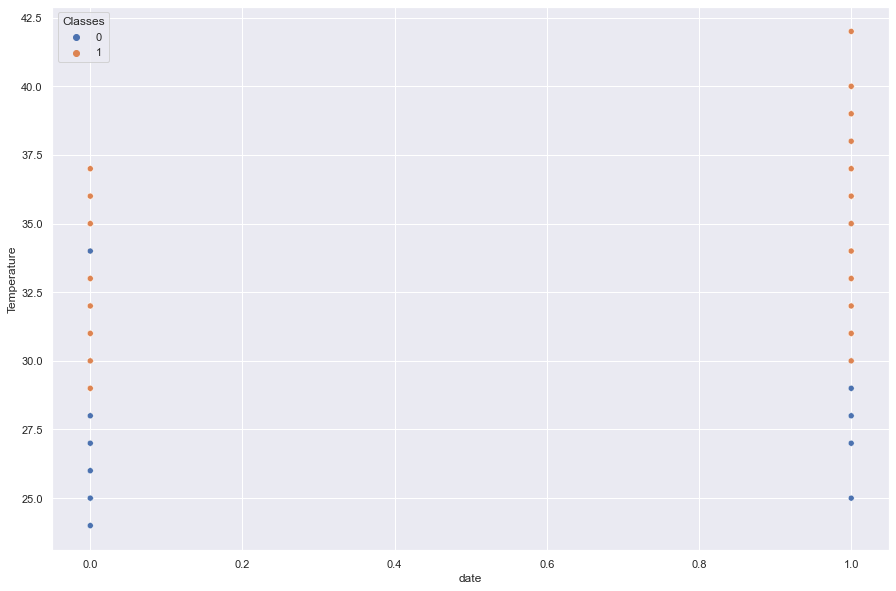

In [117]:
sns.scatterplot(data=df, x='date', y='Temperature', hue='Classes' )

In [118]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI',
       'Classes', 'date', 'Region'],
      dtype='object')

In [119]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float64
 1   RH           243 non-null    float64
 2   Ws           243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   FWI          243 non-null    float64
 9   Classes      243 non-null    int64  
 10  date         243 non-null    int64  
 11  Region       243 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 22.9 KB


# Regression Plot

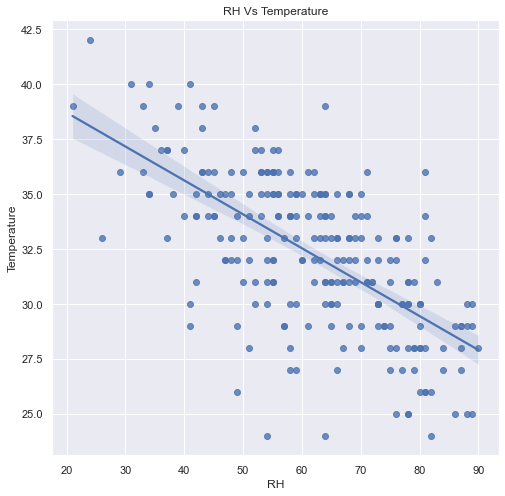

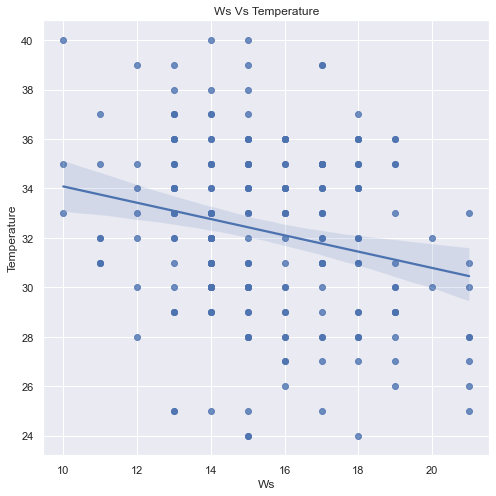

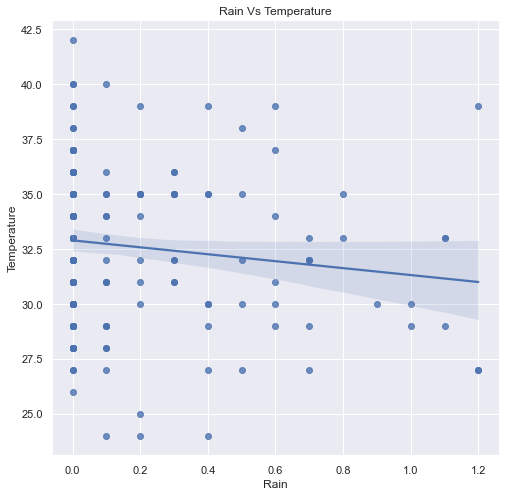

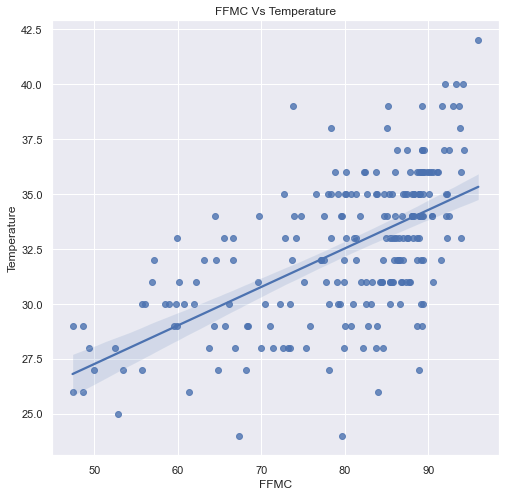

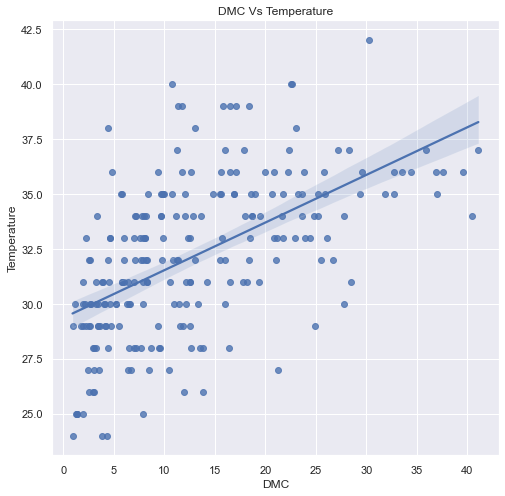

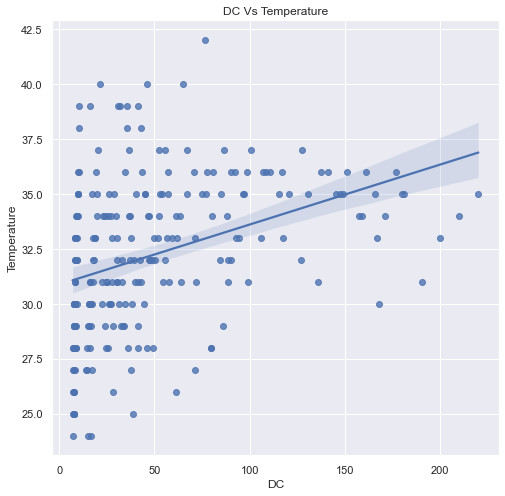

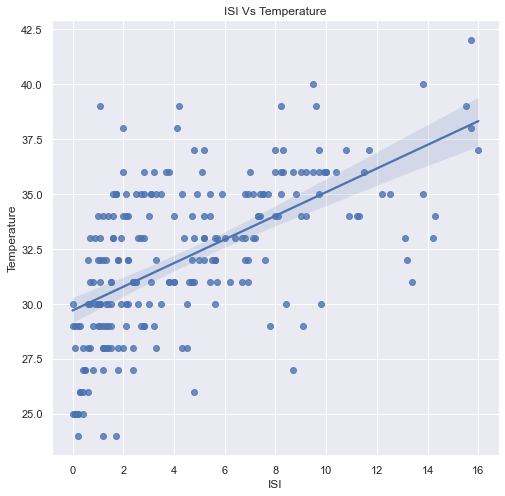

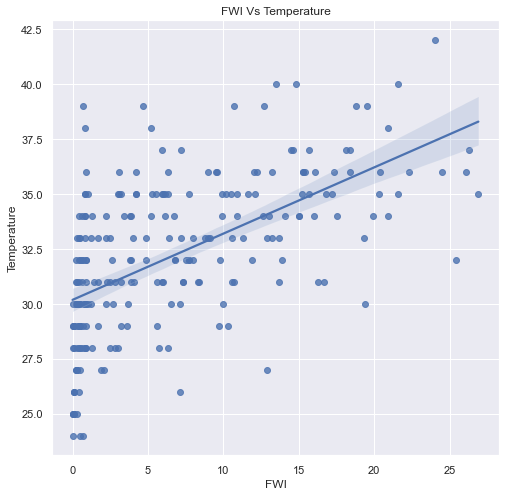

In [47]:
for feature in [feature for feature in df.columns if feature not in['Temperature', 'date', 'Region', 'Classes']]:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x=df[feature], y=df['Temperature'])
    plt.xlabel(feature)
    plt.ylabel("Temperature")
    plt.title("{} Vs Temperature".format(feature))
    plt.show();


Seperating dependent and independent feature


In [120]:
X= df[['RH', 'Ws', 'Rain','FFMC', 'DMC', 'ISI','DC',
'FWI', 'Classes', 'Region', 'date']]
y=df[['Temperature']]


In [121]:
X.head()

,RH,Ws,Rain,FFMC,DMC,ISI,DC,FWI,Classes,Region,date
0,57.0,18.0,0.0,65.7,3.4,1.3,7.6,0.5,0,0.0,0
1,61.0,13.0,0.0,64.4,4.1,1.0,7.6,0.4,0,0.0,0
2,82.0,15.0,0.0,84.1,2.5,0.3,7.1,0.1,0,0.0,0
3,89.0,13.0,0.0,84.1,1.3,0.0,6.9,0.0,0,0.0,0
4,77.0,16.0,0.0,64.8,3.0,1.2,14.2,0.5,0,0.0,0


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42) #training and test data bifurcation

In [123]:
### creating a StandardScalar object
scaler=StandardScaler()
scaler

StandardScaler()

In [124]:
### Using fit_transform to standardise Train data
X_train=scaler.fit_transform(X_train)


In [125]:
X_test=scaler.transform(X_test)


In [126]:
X_train

array([[ 1.2199876 , -0.23174876, -0.46615454, ...,  0.90566259,
         0.9877296 , -1.07703296],
       [ 0.1473255 , -1.11512052, -0.46615454, ...,  0.90566259,
        -1.01242284,  0.92847669],
       [ 0.34844965, -0.23174876, -0.46615454, ...,  0.90566259,
         0.9877296 ,  0.92847669],
       ...,
       [ 0.88478069,  0.65162299, -0.46615454, ..., -1.10416397,
        -1.01242284,  0.92847669],
       [-0.25492278,  0.20993712, -0.46615454, ...,  0.90566259,
         0.9877296 ,  0.92847669],
       [ 0.95182207,  2.41836651, -0.46615454, ..., -1.10416397,
        -1.01242284, -1.07703296]])

# Linear Regression Model

In [127]:
## creating linear regression model
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [128]:
pd.DataFrame(X_train).isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [129]:
### Passing training data(X and y) to the model
linear_reg.fit(X_train, y_train)

LinearRegression()

In [130]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(linear_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(linear_reg.intercept_))


1. Co-efficients of independent features is [[-1.5469836  -0.70365324  0.13711958 -0.57493505  0.34117473  0.22832193
   0.00395748  0.20605736  0.66116831  0.0580941   1.29337744]]
2. Intercept of best fit hyper plane is [32.16049383]


Test Data Prediction

In [131]:
linear_reg_pred=linear_reg.predict(X_test)

In [132]:
residual_linear_reg=y_test-linear_reg_pred
residual_linear_reg = pd.DataFrame(residual_linear_reg)

Validation of Linear Regression assumptions

Text(0, 0.5, 'Predicted data')

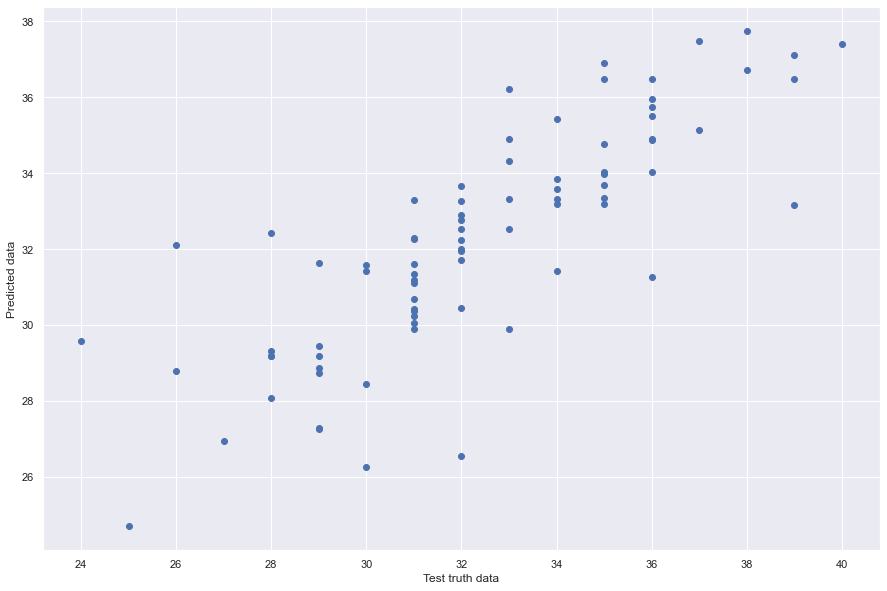

In [133]:
plt.scatter(x=y_test,y=linear_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")


We can observe the linear relation between Predicted and test truth data - Validated

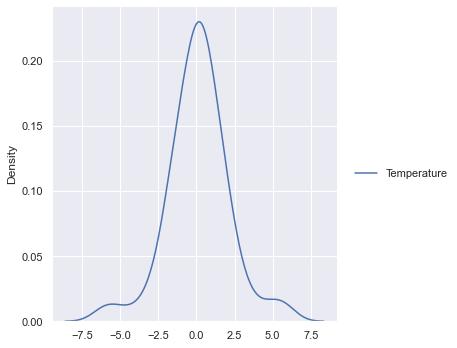

In [134]:
sns.displot(data=residual_linear_reg, kind='kde')

Residual is normally distributed - Validated

Text(0, 0.5, 'Residuals')

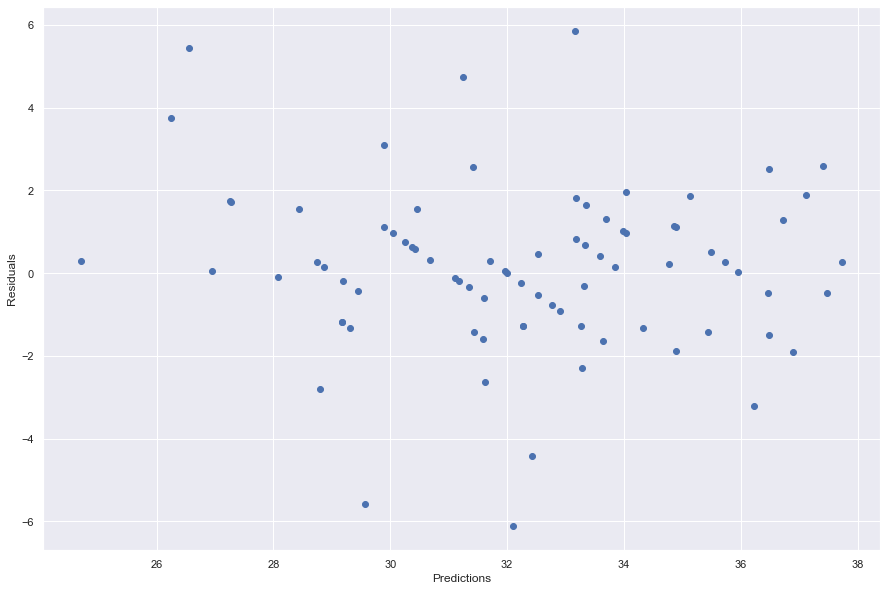

In [135]:
plt.scatter(x=linear_reg_pred, y=residual_linear_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')


Residual and Predicted values should follow uniform distribution - Observed and Validated

Cost Function Values

In [139]:
print(f"MSE : {round(mean_squared_error(y_test, linear_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, linear_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)),2)}")

MSE : 3.98
MAE :1.42
RMSE : 1.99


Performance Metrics

In [140]:
linear_reg_r2_score=r2_score(y_test, linear_reg_pred)
linear_reg_adj_r2_score=1-((1-linear_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(linear_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(linear_reg_adj_r2_score*100,2)}%")


R-Squared Accuracy : 65.455 % 
Adjusted R-Squared Accuracy : 59.95%


# Ridge Regresion Model

In [142]:
ridge_reg=Ridge()
ridge_reg

Ridge()

In [143]:
ridge_reg.fit(X_train, y_train)


Ridge()

In [144]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(ridge_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(ridge_reg.intercept_))

1. Co-efficients of independent features is [[-1.527672   -0.69710073  0.14098095 -0.54829687  0.34219816  0.23634299
   0.0045188   0.20681707  0.64219175  0.06102956  1.28288704]]
2. Intercept of best fit hyper plane is [32.16049383]


Test Data Prediction

In [145]:
ridge_reg_pred=ridge_reg.predict(X_test)

In [146]:
residual_ridge_reg=y_test-ridge_reg_pred
residual_ridge_reg = pd.DataFrame(residual_ridge_reg)

Validation of Ridge Regression assumptions


Text(0, 0.5, 'Predicted data')

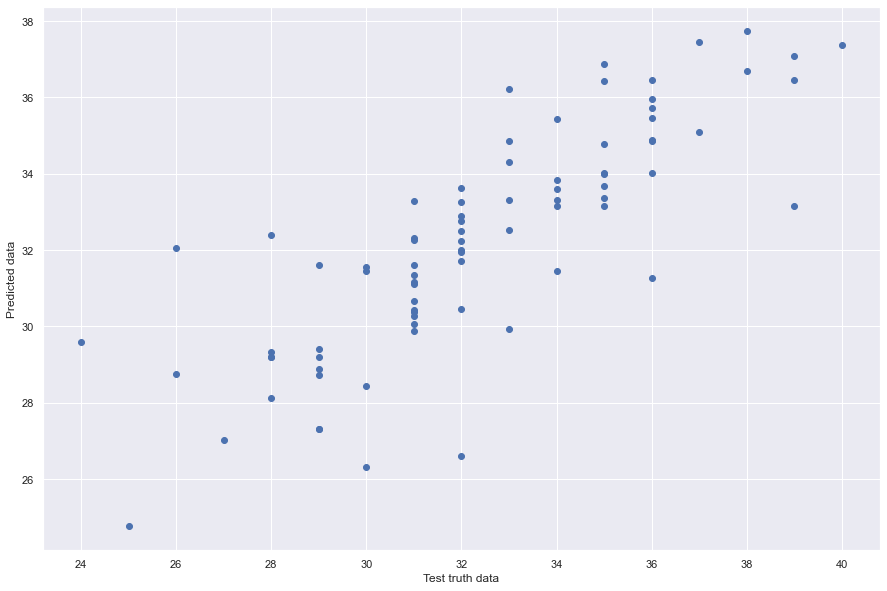

In [147]:
plt.scatter(x=y_test,y=ridge_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

Linear Relationship observed between Predicted data & Test Truth Data - Validated

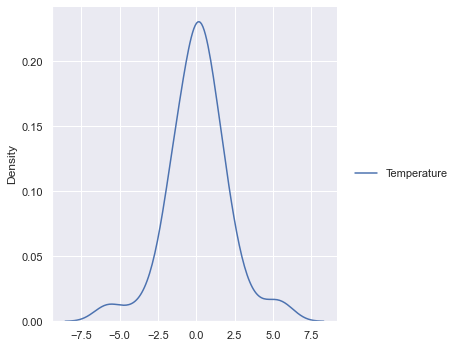

In [148]:
sns.displot(data = residual_ridge_reg, kind='kde')

Residual is normally distributed - Validated

Text(0, 0.5, 'Residuals')

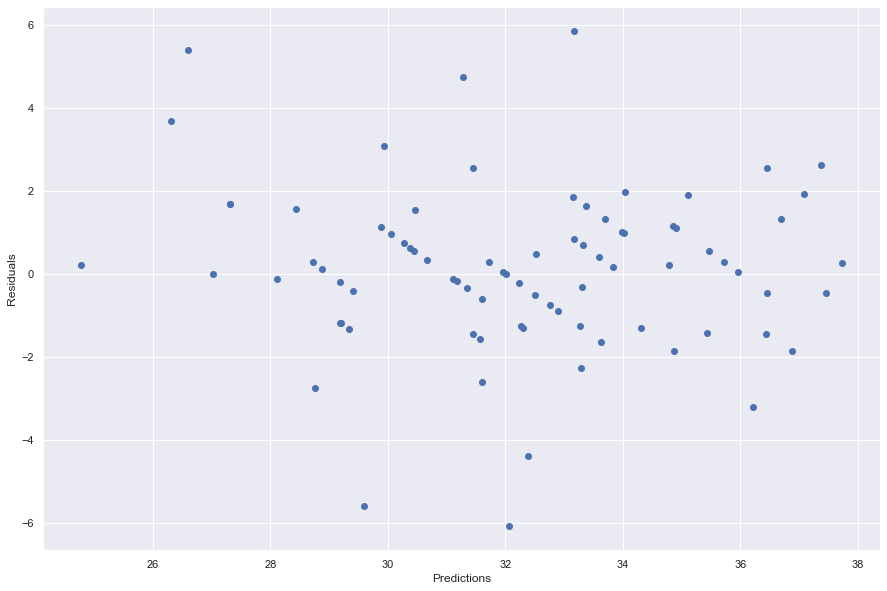

In [149]:
plt.scatter(x=ridge_reg_pred, y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

There is a uniform distribution when Residulas plotted against Predictions - Validated

Cost Function Values:

In [151]:
 print(f"MSE : {round(mean_squared_error(y_test, ridge_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, ridge_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}")


MSE : 3.95
MAE :1.42
RMSE : 1.99


Performance Metrics

In [152]:
ridge_reg_r2_score=r2_score(y_test, ridge_reg_pred)
ridge_reg_adj_r2_score=1-((1-ridge_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(ridge_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(ridge_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 65.734 % 
Adjusted R-Squared Accuracy : 60.27%


# Lasso Regression Model

In [153]:
lasso_reg=Lasso()
lasso_reg

Lasso()

In [154]:
## Passing training data(X and y) to the model
lasso_reg.fit(X_train, y_train)

Lasso()

In [155]:
## Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(lasso_reg.intercept_))

1. Co-efficients of independent features is [-1.08734742 -0.         -0.          0.          0.07431697  0.
  0.          0.14897177  0.          0.          0.53109976]
2. Intercept of best fit hyper plane is [32.16049383]


In [156]:
lasso_reg_pred=lasso_reg.predict(X_test) #prediction of test data

In [157]:
y_test = y_test.squeeze()
residual_lasso_reg = y_test-lasso_reg_pred
residual_lasso_reg = pd.DataFrame(residual_lasso_reg)

# Assumtion Validation - Lasso

Text(0, 0.5, 'Predicted data')

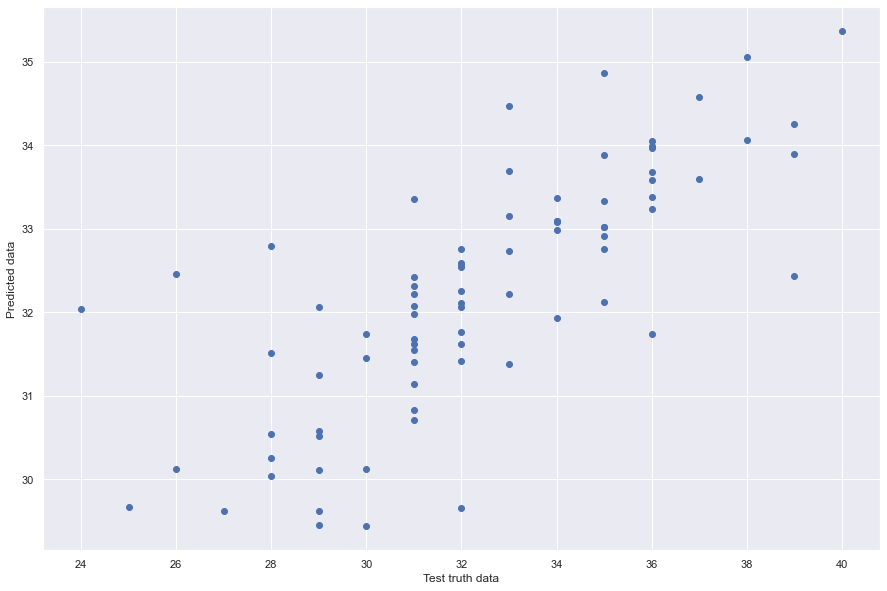

In [158]:
plt.scatter(x=y_test,y=lasso_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

Linear Relation observed between predicted data and test data - Validated

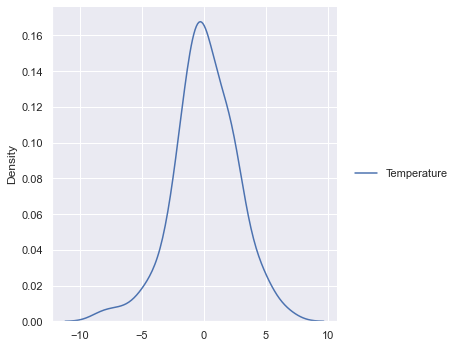

In [159]:
 sns.displot( data = residual_lasso_reg, kind='kde')


Residual is following a normal(Guassian) distribution when plotted Kernel Density Function - Validated

Text(0, 0.5, 'Residuals')

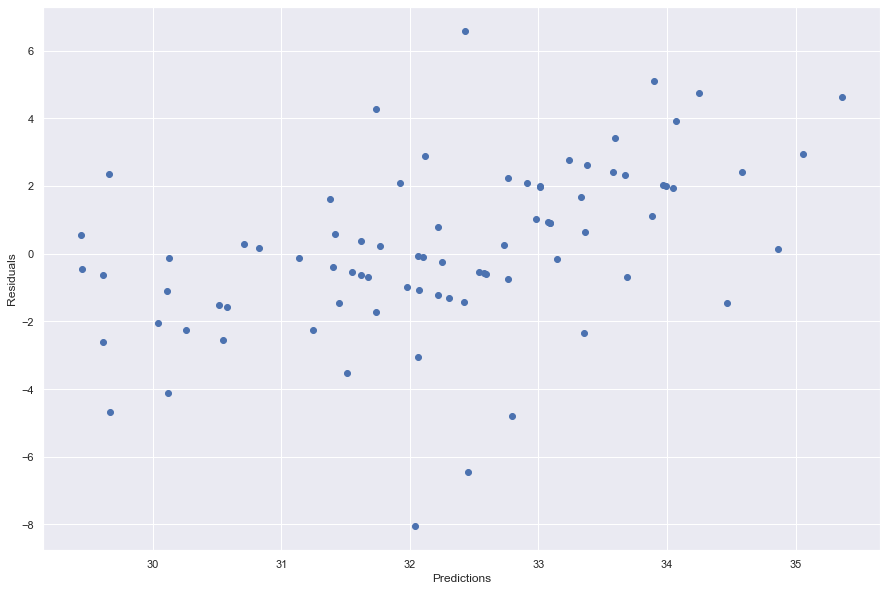

In [160]:
plt.scatter(x=lasso_reg_pred, y=residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')


Uniform distribution observed between residual and predictions - Validated

 Cost Function Values

In [161]:
print(f"MSE : {round(mean_squared_error(y_test, lasso_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, lasso_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}")


MSE : 6.25
MAE :1.89
RMSE : 2.5


Performance Metrics

In [164]:
lasso_reg_r2_score=r2_score(y_test, lasso_reg_pred)
lasso_reg_adj_r2_score=1-((1-lasso_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(lasso_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(lasso_reg_adj_r2_score*100,2)}%")


R-Squared Accuracy : 45.787 % 
Adjusted R-Squared Accuracy : 37.14%
